# Supervised machine learning

This notebook is meant as a very brief hands-on introduction to **supervised machine learning**. We'll be using a dataset that has known classes assigned to each sample. Our task will be:

**Can we build a model that accurately predicts the classes for unseen data?**

## 🐍 • Libraries

In Python, the main tool used for machine learning is [scikit-learn](https://scikit-learn.org/). We'll use it and some of the other scientific Python *stack* to play with some data as we work through the core principles of machine learning.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import (
    preprocessing, 
    neighbors, 
    decomposition,
    metrics, 
    model_selection,
)

## 🐧 • Data

For this tutorial, we'll use one of the sample datasets from the [seaborn](https://seaborn.pydata.org/) library. It contains measurements of anatomical features of 3 different species of penguin collected [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

The data are distributed under a [CC-0](https://creativecommons.org/share-your-work/public-domain/cc0/) license from the GitHub repository [allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins). The data were originally published in [Gorman et al. (2014)](https://doi.org/10.1371/journal.pone.0090081).

In [2]:
data = sns.load_dataset("penguins")
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


The seaborn function returns the data in a `pandas.DataFrame`, which would be standard way to load data stored in CSV files or Excell spreadsheets. Each row contains information about an individual and each column is a type of observation.

> **Example of good practice:** Notice how each numerical column name includes the unit! This is a great example and your future self will be very grateful if you replicate this for your own data. As a bonus, also use all lowercase characters and underscores `_` instead of spaces or dashes `-`.

<figure>
    <img src="https://github.com/allisonhorst/palmerpenguins/raw/c19a904462482430170bfe2c718775ddb7dbb885/man/figures/culmen_depth.png" alt="Illustration of the penguin beak measurements.">
    <figcaption>
        <strong>Figure:</strong> Illustration of the penguin beak measurements.
        Artwork by <a href="https://github.com/allisonhorst">@allison_horst</a>.
    </figcaption>
</figure> 

### Goal

Give the data that we have, let's set ourselves the following goal:
**predict the species from the anatomical measurements.**

Since the species is a category and not a continuous variable, we're dealing with a **classification problem** and not a regression problem. This is important to know since it will guide the models and methods that we use and research.

### Cleaning

Data cleaning and inspection is probably the most crucial part of a machine learning workflow. Without first having sufficient, good, standardized, and cleaned data there is no algorithm that will solve your problems.

The first thing to note is that our data has missing values (`NaN` or "Not a Number"). Some of the rows don't have all of the information for all features. This can cause a lot of problems in our processing and machine learning pipelines. So let's first see how many there are and which values are missing. 

In [3]:
data[np.any(data.isna(), axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


It's not that many and most are in the `sex` column, which we won't use here. So let's first drop that entire column from our dataset.

In [4]:
data.drop("sex", axis=1, inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


And then we drop every row that has at least 1 missing value.

In [5]:
data.dropna(axis=0, inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


Now the problem is that the index doesn't match the number of rows in our table (notice that the last row is 343 when we only have 342 rows). This happens because `pandas` deletes rows but keeps the original index numbers intact (which is a sensible default). 

Let's re-align the index with the number of rows.

In [6]:
data.reset_index(drop=True, inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


Now we have data that has no missing values and we're ready to start.

### Visualize

Now that we have clean and ordered data, it's important to visualize the data so that we know what we're dealing with. For this dataset, we have few enough features (columns) and samples (rows) to visualize it straight away. Otherwise, we should apply some sort of [dimensionality reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html) first.

A standard way to plot the different features and the pair-wise relationship between then is with a "pair plot". Thankfully, we don't have to create these ourselves with `matplotlib` since `seaborn` has a function just for this.

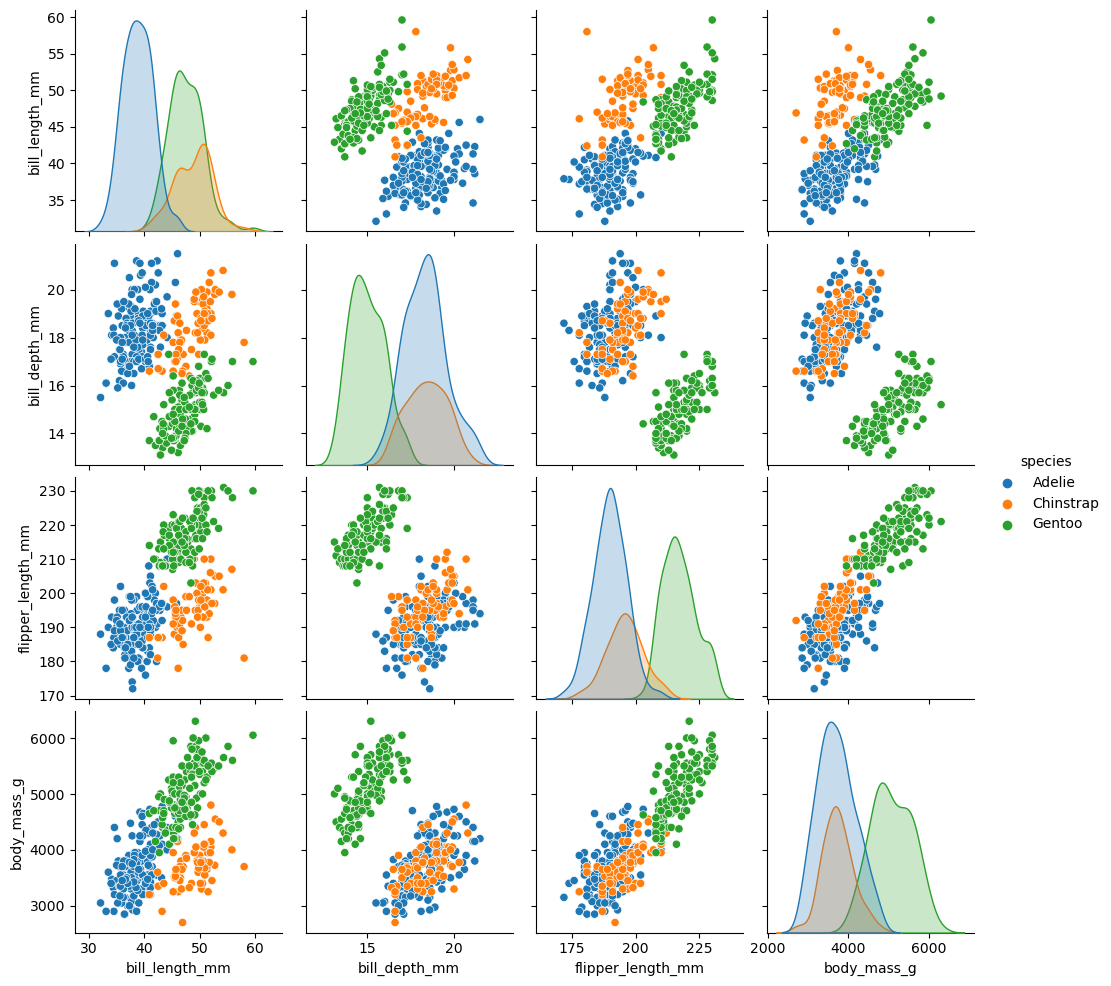

In [7]:
sns.pairplot(data, hue="species")

In the figure above, each graph is a cross-plot of 2 different numerical columns in our dataset. The diagonal in the middle is the estimated distribution of that numerical column. Each plot is colored by the respective species.

What we can see from this is that some features are highly correlated for some species. For example, body mass and flipper length or flipper length and and bill depth (for Chinstrap and Adelie). Notice also how the distributions overlap heavily but the overlap isn't always the same. For example, the body mass of Adelie and Chinstrap penguins overlap but not their bill length.

**If all features were correlated and overlapping, we'd have very little chance of differentiating between the different classes** (species) using them and our machine learning pipeline would halt here. It would indicated that we probably need to gather data from a different feature.

Since that's not the case, let's move on and see what we can do.

### Format

Scikit-learn and a lot of other Python libraries for machine learning (which largely try to emulate scikit-learn), require the data to be formatted in a certain way before it can be used. 

**Features:** The observations that we will use as predictors of the species. These need to be stored in a 2D array (basically a matrix). Each **row** of this matrix is a **sample** (in our case the measurements of an individual) and each **column** corresponds to a different **feature**. This matrix is often called `X` in the scikit-learn documentation.

We can make the feature matrix `X` from our `pandas.DataFrame` by selecting the columns and getting the `.values` attribute (which returns the data in a `DataFrame` as a 2D array).

In [8]:
feature_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = data[feature_columns].values
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

This is another example of why getting the data sorted into a standard format early is important. Making the feature matrix would be difficult to do if we hadn't done that previously.

**Labels/classes:** The thing that we are trying to predict from our features. In our case, we have labels for each sample in our dataset (the `species` column). The labels must be stored in a 1D array (can be 2D depending on the application). In the scikit-learn documentation this is often called `y`.

In [9]:
y = data.species.values
y

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adel

That we have our `X` and `y` variables, we can start trying to learn from the data with scikit-learn.

## 🤖 • Supervised learning: Training models for prediction

Since we have labels for our data (the species), we can train models to predict these labels based on the input features. Machine learning techniques that follow this procedure fall under the supervised learning category. Examples of supervised learning include linear regression, support vector machines, neural networks (including deep learning), and more. Once we have trained our model, we can then use it to predict the labels of new data that comes in without labels (new penguin measurements by someone who doesn't know the species).

The simplest possible supervised learning model for our classification problems is a [k-nearest-neighbors classifier](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) (kNN). The general idea is to assign labels based on the labels of a sample's *k* nearest neighbors (the label with a majority is used). This method is fast and scales well to larger datasets so it's a good choice for a first pass.

In [10]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X, y)
knn_prediction = knn.predict(X)
data = data.assign(species_knn=knn_prediction)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_knn
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Adelie
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Adelie
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Chinstrap
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Adelie
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Chinstrap
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Gentoo
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Gentoo
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Gentoo
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Gentoo


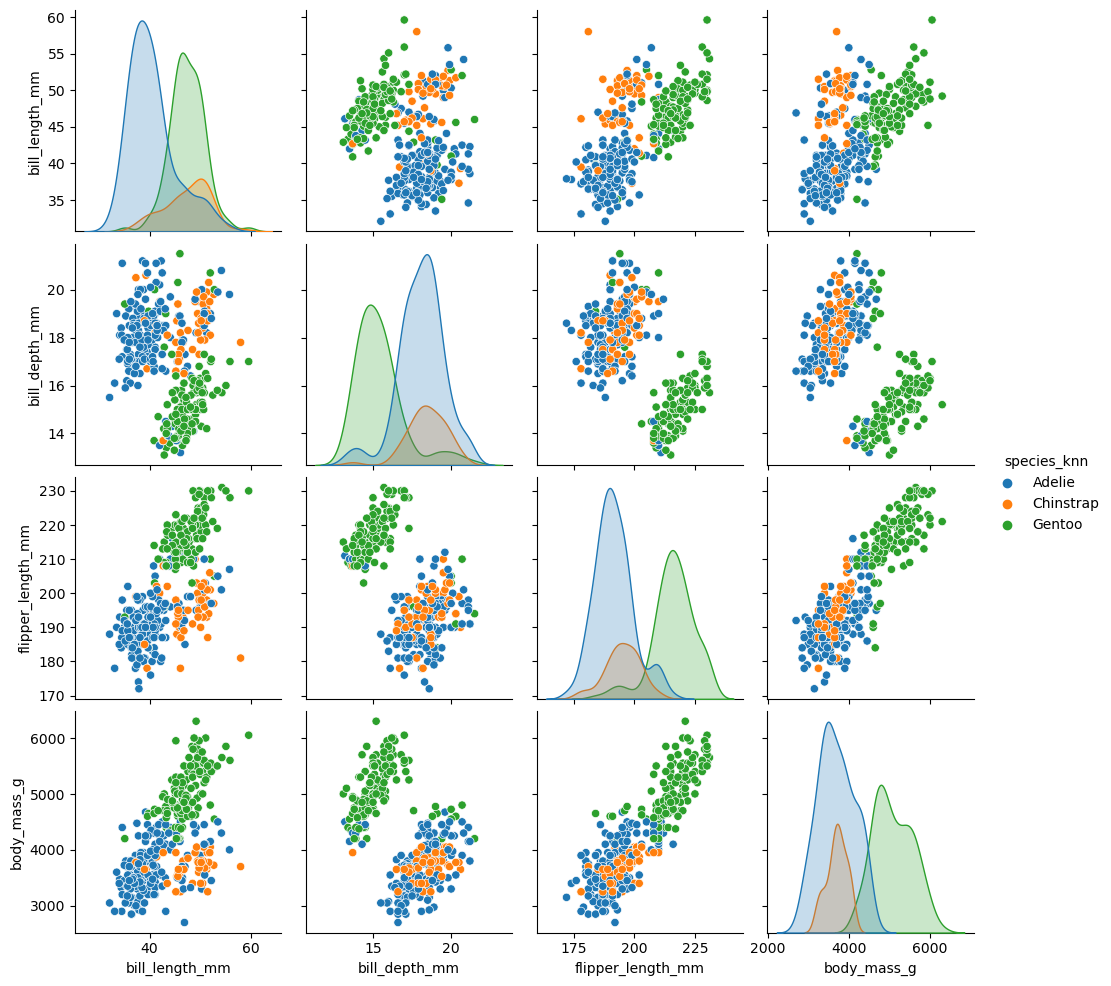

In [11]:
sns.pairplot(data, hue="species_knn", vars=feature_columns)

Compare this plot of our model predictions against the plot of the actual species and you'll see that Chinstrap penguins are often misclassified as Adelie. This is not a horrible result but it's not great either. Clearly the model doesn't fit the data very well.

Let's try another metric of how well our class predictions fit the observed data. This is a called a **confusion matrix**:

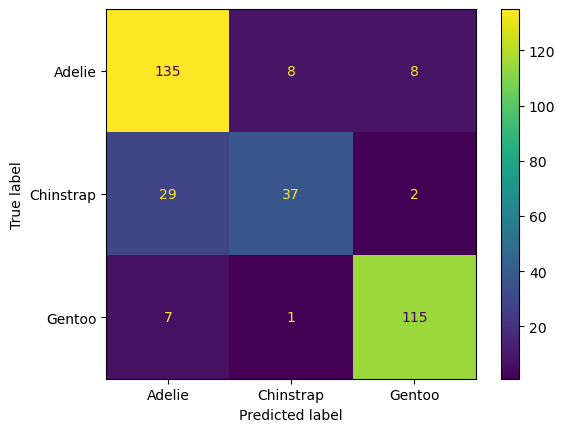

In [12]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=data.species, y_pred=data.species_knn,
)
plt.show()

The confusion matrix shows us how many misclassifications we had. For example, looking at the second row first column of the matrix shows how many chinstrap penguins were misclassified as adelie.

Another metric that is more concise is an [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) (read the reference for the maths behind it). Basically, it tells us how close two non-numerical arrays are by counting the number of entries that are equal and dividing by the number of samples. If all entries are the same, the score will be 1. If none of them are, the score will be 0.

In [13]:
metrics.accuracy_score(data.species, data.species_knn)

0.8391812865497076

**Running these simplistic models with little preprocessing can provide a useful benchmark**. More sophisticated models need to be at least better than this.

I can't stress this enough: 

> **Always start with the simplest model and check your data before moving to more complex models!**


## The importance of scaling

Before moving on, we should always try to **understand why the model failed** and **check if there is a problem with our data**. If our data are faulty or need some more cleaning, there is no amount of cleverness in model choice that will overcome that. As the saying goes:

> **Garbage in, garbage out.** 🗑️

Going back to our data, let's have a look at the statistics for each feature.

In [14]:
data[feature_columns].mean(axis=0)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [15]:
data[feature_columns].std(axis=0)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64

Notice that the body mass is 2 orders of magnitude larger in both mean and standard deviation than the bill measurements. That should raise some red flags since our method calculates Euclidian distances between different samples and we know that **large values will skew the mean towards them**.

What can we do to mitigate this? The standard practice, and an **underlying assumption for many machine learning methods**, is that all features have **zero mean and unit standard deviation** (in other words, are as close to normally distributed as possible).

The simplest possible method to resolve this is to subtract the mean and divide by the standard deviation for each feature. In scikit-learn, we can do this with the `StandardScaler`.

In [16]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [17]:
X_scaled.mean(axis=0)

array([ 1.66208827e-16, -1.41277503e-15, -8.31044135e-16,  4.15522068e-17])

In [18]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

Now let's try the KNN again on the scaled data. 

In [19]:
knn.fit(X_scaled, y)
data = data.assign(species_knn_scaled=knn.predict(X_scaled))
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_knn,species_knn_scaled
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Adelie,Adelie
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Adelie,Adelie
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Chinstrap,Adelie
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Adelie,Adelie
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Chinstrap,Adelie
...,...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Gentoo,Gentoo
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Gentoo,Gentoo
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Gentoo,Gentoo
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Gentoo,Gentoo


And now we do the pair plot, confusion matrix, and accuracy score as well.

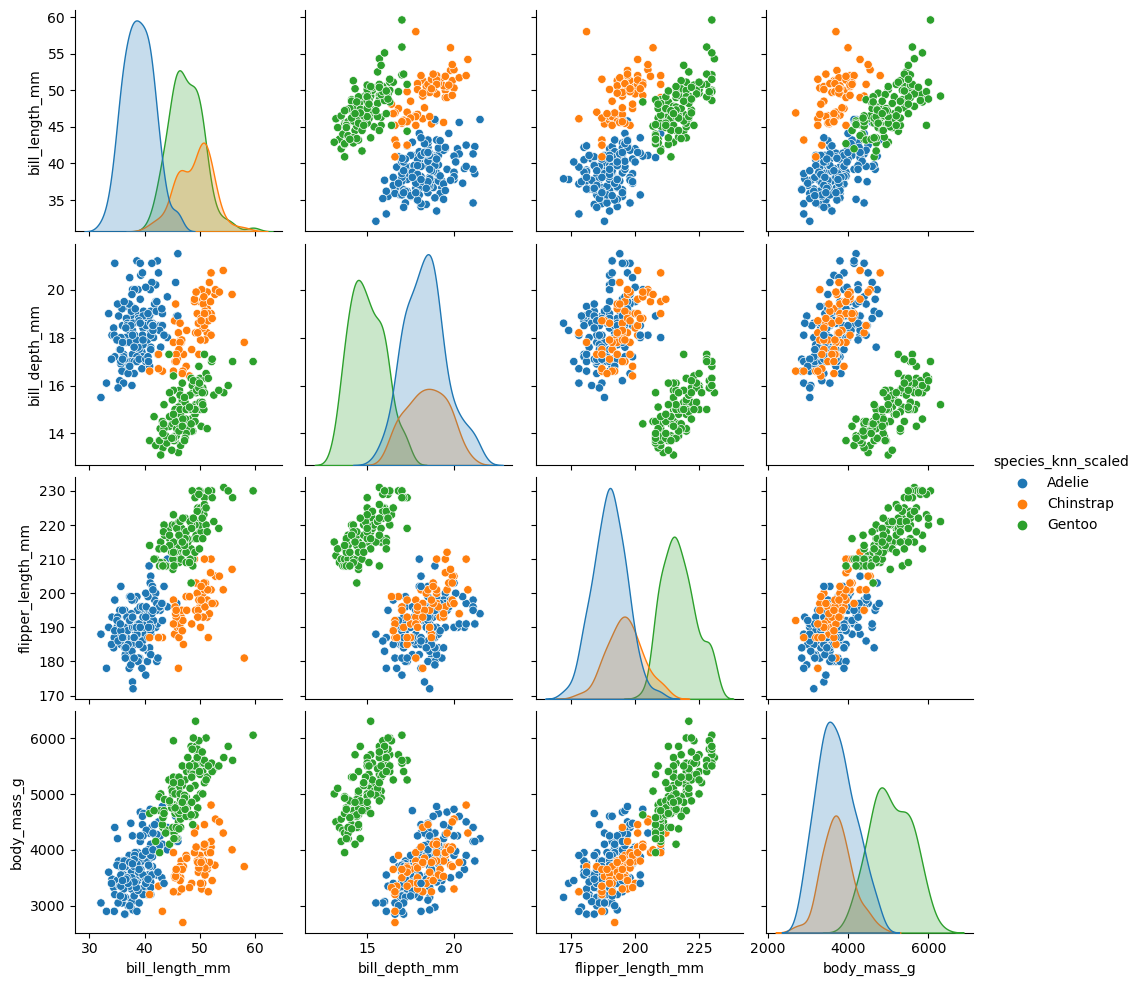

In [20]:
sns.pairplot(data, hue="species_knn_scaled", vars=feature_columns)

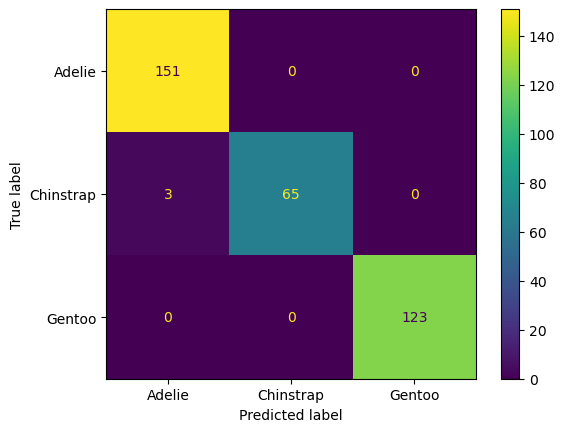

In [21]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=data.species, y_pred=data.species_knn_scaled,
)
plt.show()

In [22]:
metrics.accuracy_score(data.species, data.species_knn_scaled)

0.9912280701754386

That's a big improvement! The prediction is almost perfect now and the number of misclassifications is very low.

### What is this high score actually telling us?

It's calculated by comparing the known labels that we used to train our model against the labels predicted by the model. So it indicates how well our model fits the data. That's a good thing to know. But our **data has noise** (for example, misidentified species) so we probably don't want to fit the data perfectly, otherwise we'd be replicating noise in the predictions. This is often called **over-fitting** in machine learning and is a major pitfall to avoid!

What we **actually want to know** is not how well we can fit the training data, but **how well will our model perform when given new data**. In other words, what is the predictive power of our model? The accuracy scores above don't tell us anything about that.

## 🕵🏽 • Validation: How good are our predictions?

If we want to answer the question *"how well does our model perform on new data"*, we have to **keep back some data** from the training process. We can then use this data to **test our model's performance** on unseen data. This is known as **cross-validation**, where we validate the model using the data itself.

With scikit-learn, the easiest way to do this is with the [`train_test_split` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split). By default, it splits the input data randomly into 75% training data and 25% testing data.

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((256, 4), (86, 4))

The procedure now is to **fit** our model pipeline (scaling + kNN) on the **training data**. 

In [24]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

When predicting, we'll also need put the input through the same pipeline (scaling + kNN).

In [25]:
y_prediction = knn.predict(scaler.fit_transform(X_test))

And then **score** the trained model prediction against the **testing data**.

In [26]:
metrics.accuracy_score(y_test, y_prediction)

0.9883720930232558

Doing that we get a lower score that is more representative of the accuracy we should expect when applying our model in the real world. It's still a very good score, though!

Let's see what the confusion matrix is like for the predictions on the test data.

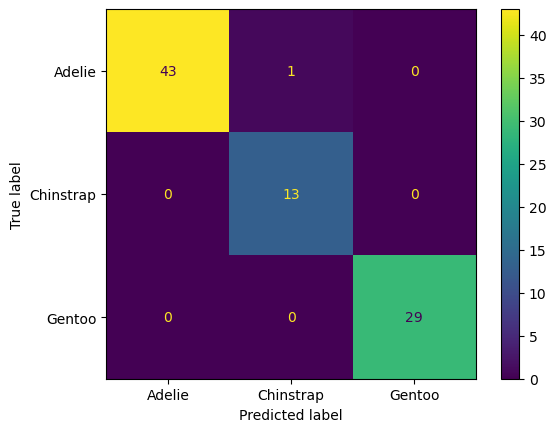

In [27]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_prediction,
)
plt.show()

> **WARNING:** It can be tempting to scale the data before the train-test split since it avoids repeating the operation. **Don't do this!** It will lead to something called [data leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)), which is when information about the test data leaks into the training process. In this case, through the mean and standard deviation used in scaling. Leakage will lead to overestimation of accuracy. 

A limitation of this method is that the score is dependent on how the data were split. If you run the entire code above (split, train, test) while changing the `random_state` in `train_test_split` multiple times, you will get different scores depending on the roll of the dice (give it a try!).

## 🔀 • Cross-validation: reducing the effect of chance

We can do better by using a more exhaustive form of cross-validation known as [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). This involves splitting the data multiple times systematically and alternating which part is used to training and testing. This way, all of our data has been used for both purposes by the end.

For each iteration, `KFold` tells us the indices of the data that fall in the training and testing sets. We can then use these to select the subsets from our original data.

In [28]:
kfold = model_selection.KFold()

scores = []
for train, test in kfold.split(X, y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train_scaled, y_train)
    y_prediction = knn.predict(scaler.fit_transform(X_test))
    score = metrics.accuracy_score(y_test, y_prediction)
    
    scores.append(score)
    
print(scores)

[0.30434782608695654, 0.3188405797101449, 0.36764705882352944, 0.3382352941176471, 0.0]


**Wow, those are very bad! What is going on?**

By default, `KFold` splits the data evenly. This means that in the first fold, there is very likely only samples from Adelie penguins. So this will lead to the occurrence of classes in each fold is different from the original dataset. Let's check this.

In [29]:
for train, test in kfold.split(X, y):
    print("Traning data:")
    print(data.iloc[train].species.value_counts())
    print("\nTesting data:")
    print(data.iloc[test].species.value_counts())
    print("======================================\n")

Traning data:
Gentoo       123
Adelie        82
Chinstrap     68
Name: species, dtype: int64

Testing data:
Adelie    69
Name: species, dtype: int64

Traning data:
Gentoo       123
Adelie        82
Chinstrap     68
Name: species, dtype: int64

Testing data:
Adelie    69
Name: species, dtype: int64

Traning data:
Adelie       138
Gentoo       123
Chinstrap     13
Name: species, dtype: int64

Testing data:
Chinstrap    55
Adelie       13
Name: species, dtype: int64

Traning data:
Adelie       151
Gentoo        68
Chinstrap     55
Name: species, dtype: int64

Testing data:
Gentoo       55
Chinstrap    13
Name: species, dtype: int64

Traning data:
Adelie       151
Chinstrap     68
Gentoo        55
Name: species, dtype: int64

Testing data:
Gentoo    68
Name: species, dtype: int64



To preserve the frequency of each class in the folds, we can use `StratifiedKFold`.

In [30]:
stratkfold = model_selection.StratifiedKFold()

for train, test in stratkfold.split(X, y):
    print("Traning data:")
    print(data.iloc[train].species.value_counts())
    print("\nTesting data:")
    print(data.iloc[test].species.value_counts())
    print("======================================\n")

Traning data:
Adelie       120
Gentoo        98
Chinstrap     55
Name: species, dtype: int64

Testing data:
Adelie       31
Gentoo       25
Chinstrap    13
Name: species, dtype: int64

Traning data:
Adelie       121
Gentoo        98
Chinstrap     54
Name: species, dtype: int64

Testing data:
Adelie       30
Gentoo       25
Chinstrap    14
Name: species, dtype: int64

Traning data:
Adelie       121
Gentoo        99
Chinstrap     54
Name: species, dtype: int64

Testing data:
Adelie       30
Gentoo       24
Chinstrap    14
Name: species, dtype: int64

Traning data:
Adelie       121
Gentoo        99
Chinstrap     54
Name: species, dtype: int64

Testing data:
Adelie       30
Gentoo       24
Chinstrap    14
Name: species, dtype: int64

Traning data:
Adelie       121
Gentoo        98
Chinstrap     55
Name: species, dtype: int64

Testing data:
Adelie       30
Gentoo       25
Chinstrap    13
Name: species, dtype: int64



Now we can use that to calculate new scores for our model.

In [31]:
scores = []
for train, test in stratkfold.split(X, y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    knn = neighbors.KNeighborsClassifier()
    knn.fit(X_train_scaled, y_train)
    y_prediction = knn.predict(scaler.fit_transform(X_test))
    score = metrics.accuracy_score(y_test, y_prediction)
    
    scores.append(score)    
print(scores)

[0.9710144927536232, 0.9855072463768116, 0.9852941176470589, 1.0, 0.9852941176470589]


Now we can calculate the mean score, which will be more stable across multiple runs and a better representation of our model accuracy.

In [32]:
np.mean(scores)

0.9854219948849104

That's still a good score and it will be more robust against randomness. Sadly, **most datasets won't provide a score this good**. 

## 🔖 • Summary

The main take home messages of this tutorial are:

* **Always** start by thoroughly inspecting, cleaning, and formatting your data. This includes [standardization](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling), [principle component analysis](https://scikit-learn.org/stable/modules/unsupervised_reduction.html#pca-principal-component-analysis), [encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features), and [more](https://scikit-learn.org/stable/data_transforms.html). 
* Start with the **simplest possible model** (for example, `KMeans` for clustering, `LinearModel` for regression, or `KNeighborsClassifier` for classification) **before** reaching for more complex models (looking at you deep learning 👺). Your goal with other models is always to be at least better than these simple models.
* Understanding **how methods work is essential** for diagnosing problems. Treating them as black boxes will only take you so far.
* Always **split your data and cross-validate** to assess model performance and avoid over-fitting. 
    * OK: Single random split into training and testing (`train_test_split`)
    * Good: K-Fold splits into training and testing (`cross_val_score`)
    * Great: Single random split into training and *validation* and then K-Fold split training and testing (`train_test_split` + `cross_val_score`)
    * Best: Nested cross-validation (2 x `cross_val_score`)

## 🧑🏾‍🎓 • Further reading

What to look into for the future.

* The [scikit-learn documentation](https://scikit-learn.org/) is full of examples, theory, and tutorials. This part on [model tuning](https://scikit-learn.org/stable/modules/grid_search.html) is a must-read!
* The [Software Underground]() has some video tutorials on machine learning for geoscience as part of their Transform events: 
  * [Tutorial: Big data lithology prediction with machine learning](https://www.youtube.com/watch?v=TBa791rkIDE)
  * [Tutorial: Back to basics with data and statistical concepts for data analysis](https://www.youtube.com/watch?v=Fx3xb3tLAZE)
  * Tons of other tutorials on their [YouTube channel](https://www.youtube.com/c/SoftwareUnderground).
* Jake VanderPlas has an excellent [video tutorial](https://youtu.be/HC0J_SPm9co).